Import libraries and modul

In [219]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
import os

In [220]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor


Load Dataset

In [221]:
train=pd.read_csv('train.csv')

In [222]:
test=pd.read_csv('test.csv')

In [223]:
submission=pd.read_csv('sample_submission.csv')

# Data Exploration

In [224]:
print('Shape of train dataset: ',train.shape)
train.head()

Shape of train dataset:  (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


SalePrice: This is the target variable, and it represents the sale price of the property in dollars. In the context of the competition, your objective is to predict this variable.

MSSubClass: This field represents the building class of the property. It provides information about the type of dwelling involved.

MSZoning: This field indicates the general zoning classification of the property, which is a way to categorize and regulate land use.

LotFrontage and LotArea: These fields provide information about the size of the property. LotFrontage is the linear feet of street connected to the property, and LotArea is the size of the lot in square feet.

Street and Alley: These fields describe the type of road access (Street) and the type of alley access to the property.

LotShape: This field defines the general shape of the property.

LandContour: It describes the flatness of the property.

Utilities: This field indicates the type of utilities available in the property.

Neighborhood: This represents the physical locations within the Ames city limits.

OverallQual and OverallCond: These fields provide information about the overall material and finish quality, as well as the overall condition rating of the property.

YearBuilt and YearRemodAdd: They represent the original construction date and the remodel date of the property, respectively.

RoofStyle and RoofMatl: These fields describe the type of roof and the roofing material.

Exterior1st and Exterior2nd: They indicate the exterior covering on the house, with Exterior2nd being applicable if there is more than one material.

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF: These fields provide information about the basement, including its quality, condition, exposure, finished area, and unfinished area.

Heating and HeatingQC: These fields describe the type of heating and the heating quality and condition.

CentralAir: Indicates whether the property has central air conditioning.

Electrical: Describes the electrical system in the house.

1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea: These fields represent the square footage of different floors and the above-grade (ground) living area square footage.

BsmtFullBath, BsmtHalfBath, FullBath, HalfBath: Provide information about the number of bathrooms on different levels.

Bedroom, Kitchen, KitchenQual, TotRmsAbvGrd: These fields provide information about the number of bedrooms, kitchens, and the quality of the kitchen.

Functional: Describes the home's functionality rating.

Fireplaces and FireplaceQu: Indicate the number of fireplaces and the quality of the fireplace.

GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond: Provide information about the garage, including its type, year built, finish, size, and quality.

PavedDrive: Indicates whether the property has a paved driveway.

WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch: These fields represent the square footage of different types of porches.

PoolArea and PoolQC: Provide information about the pool area and its quality.

Fence: Describes the quality of the fence.

MiscFeature and MiscVal: Miscellaneous features not covered in other categories and their corresponding values.

MoSold and YrSold: Represent the month and year the property was sold.

SaleType and SaleCondition: Provide information about the type of sale and the condition of the sale.

In [225]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [226]:
train.Id= train.drop(columns=['Id'],axis=1,inplace=True)

In [227]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Visualization

In [228]:
target = 'SalePrice'

def col_dtypes(train, target):
    num_col = train.select_dtypes('number').columns.to_list()
    cat_col = train.select_dtypes("object").columns.to_list()

    num_col = [col for col in num_col if col not in [target]]

    return num_col, cat_col

num_col, cat_col = col_dtypes(train, target)

print(f'Num Cols:,{num_col}', end='\n\n')
print(f"Cat col:, {cat_col}")

Num Cols:,['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

Cat col:, ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Ga

In [229]:
train["SalePrice"].quantile([0,0.25,0.50,0.75,0.99])

0.00     34900.00
0.25    129975.00
0.50    163000.00
0.75    214000.00
0.99    442567.01
Name: SalePrice, dtype: float64

In [230]:
import numpy as np

train["SalePrice_Range"] = pd.cut(train["SalePrice"], 
                                 bins=np.array([-np.inf, 100, 150, 200, np.inf])*1000, 
                                 labels=["0-100k","100k-150k","150k-200k","200k+"])

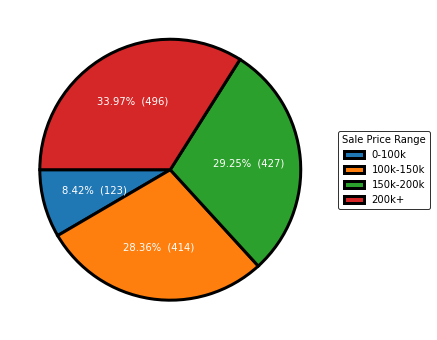

In [231]:
labels="0-100k","100k-150k","150k-200k","200k+"

fig,ax=plt.subplots(figsize=(10, 6),subplot_kw=dict(aspect="equal"))

value_count = train["SalePrice_Range"].value_counts()

data = [value_count[0],value_count[1],value_count[2],value_count[3]]

plt.pie([train["SalePrice_Range"].value_counts(ascending=True).values[0],
        train["SalePrice_Range"].value_counts(ascending=True).values[1],
        train["SalePrice_Range"].value_counts(ascending=True).values[2],
        train["SalePrice_Range"].value_counts(ascending=True).values[3]],
        textprops=dict(size= 10, color= "white"),autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(data)/100),startangle = 180,wedgeprops=dict( edgecolor = "black", linewidth = 3))

plt.legend( labels, title="Sale Price Range",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")


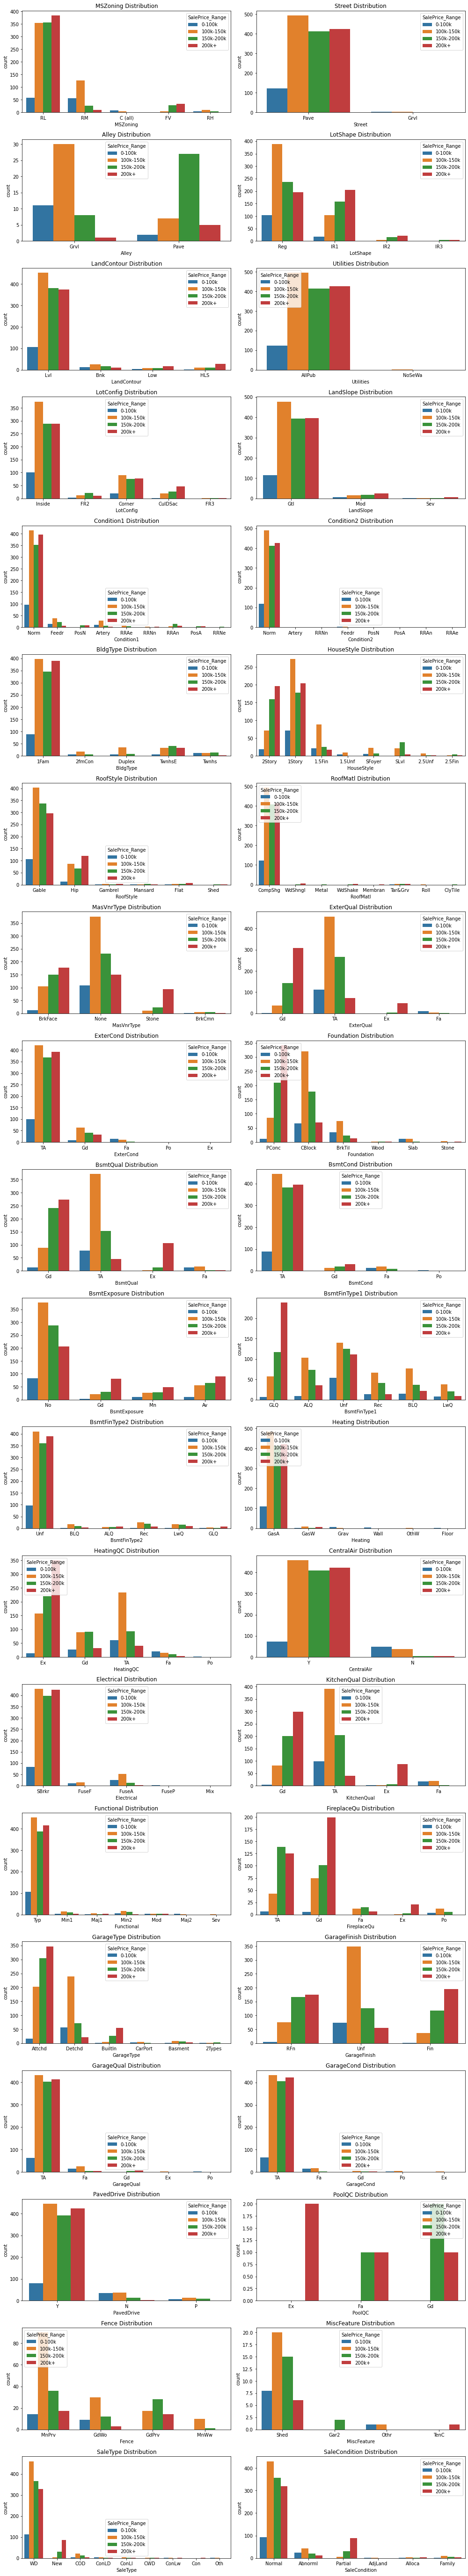

In [232]:
num_cols, cat_cols = col_dtypes(train, target)
cat_cols = train[cat_cols].columns[train[cat_cols].nunique() < 10]
plt.figure(figsize=(14,len(cat_cols)*2))
for idx,column in enumerate(cat_cols):
    plt.subplot(len(cat_cols)//2+1,2,idx+1)
    sns.countplot(hue="SalePrice_Range", x=column, data=train)
    plt.title(f"{column} Distribution")
    plt.tight_layout()

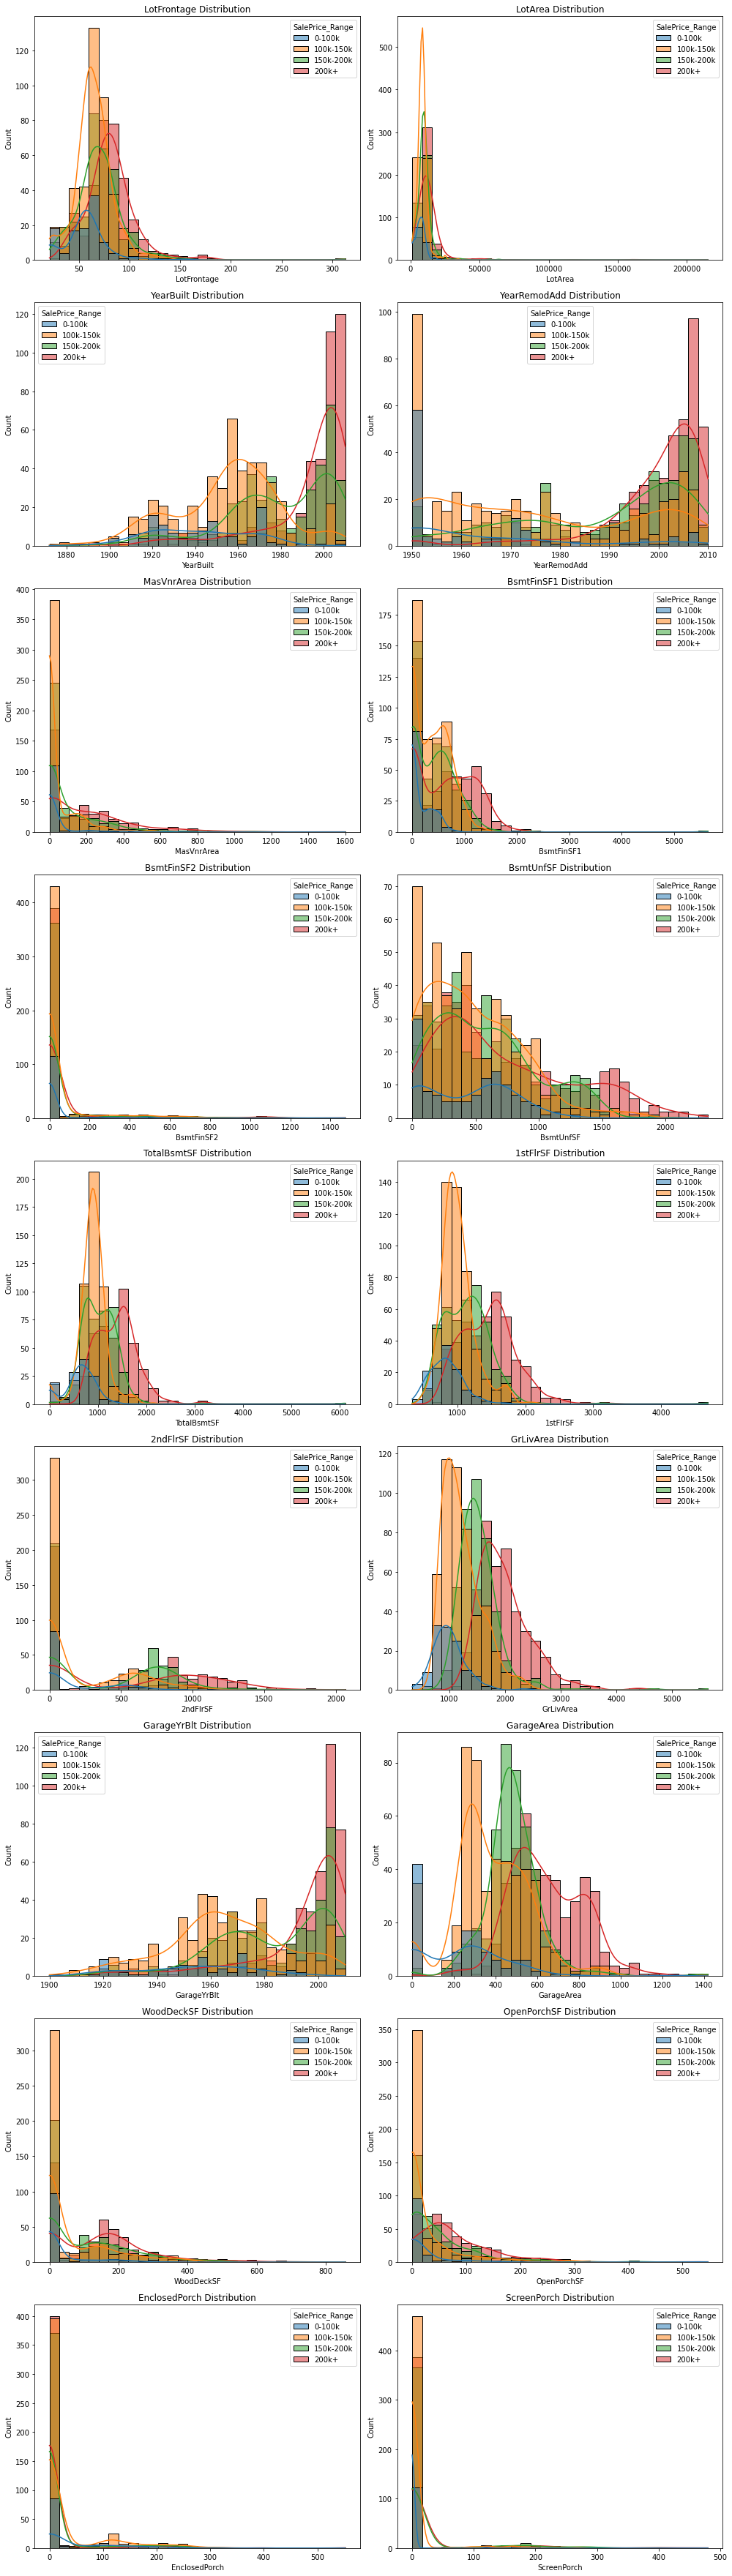

In [233]:
num_cols, cat_cols = col_dtypes(train, target)
num_cols = train[num_cols].columns[train[num_cols].nunique() > 25]
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.histplot(x=column, hue="SalePrice_Range", data=train,bins=30,kde=True)
    plt.title(f"{column} Distribution")
    plt.tight_layout()

# Data Preparation

In [234]:
df = pd.read_csv('train.csv')

In [235]:
missing_data=df.isna().sum()
missing_data = missing_data[missing_data>0]
missing_data

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Missing value for the categorical column can be replaced with 'NA'. 'NA' means not available

In [236]:
# List of columns to fill with 'Unknown'
columns_to_fill = ['Alley',  'MiscFeature','PoolQC','Fence','FireplaceQu',
                   'GarageType', 'GarageFinish','GarageQual', 'GarageCond', 'MasVnrType', 
                   'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond', 'BsmtQual']

# Fill missing values with 'Unknown'
df[columns_to_fill] = df[columns_to_fill].fillna('Unknown')

In [237]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median()) #This missing value can be replaced with median or mean LotFrontage of the neighborhood
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

In [238]:
missing_data=df.isna().sum()
missing_data = missing_data[missing_data>0]
missing_data

Series([], dtype: int64)

In [239]:
numeric_col = df.select_dtypes(include=['int64','float64']).columns.tolist()

#check contain negative

count_negative = df[numeric_col].apply(lambda x: (x < 0).sum())
count_negative = count_negative[count_negative > 0]
count_negative

Series([], dtype: int64)

In [240]:
df = df.drop(columns=['Id'])

In [242]:
df = df.drop(columns=['Neighborhood','Condition1','Condition2'])

In [243]:
le=LabelEncoder()
label_mapping = {}
catcol=[col for col in df.columns if df[col].dtype == 'object']
for col in catcol:
    df[col]=le.fit_transform(df[col])
    label_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))

label_mapping


{'MSZoning': {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4},
 'Street': {'Grvl': 0, 'Pave': 1},
 'Alley': {'Grvl': 0, 'Pave': 1, 'Unknown': 2},
 'LotShape': {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3},
 'LandContour': {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3},
 'Utilities': {'AllPub': 0, 'NoSeWa': 1},
 'LotConfig': {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4},
 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
 'BldgType': {'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'Twnhs': 3, 'TwnhsE': 4},
 'HouseStyle': {'1.5Fin': 0,
  '1.5Unf': 1,
  '1Story': 2,
  '2.5Fin': 3,
  '2.5Unf': 4,
  '2Story': 5,
  'SFoyer': 6,
  'SLvl': 7},
 'RoofStyle': {'Flat': 0,
  'Gable': 1,
  'Gambrel': 2,
  'Hip': 3,
  'Mansard': 4,
  'Shed': 5},
 'RoofMatl': {'ClyTile': 0,
  'CompShg': 1,
  'Membran': 2,
  'Metal': 3,
  'Roll': 4,
  'Tar&Grv': 5,
  'WdShake': 6,
  'WdShngl': 7},
 'Exterior1st': {'AsbShng': 0,
  'AsphShn': 1,
  'BrkComm': 2,
  'BrkFace': 3,
  'CBlock': 4,
  'CemntBd': 5,
  'HdBoard': 6,
  'Im

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   Alley          1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  BldgType       1460 non-null   int32  
 12  HouseStyle     1460 non-null   int32  
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   int32  
 18  RoofMatl

Correlation

In [245]:
df2=df.corr().SalePrice.reset_index().sort_values(by='SalePrice',ascending=False).head(10)
df2

,index,SalePrice
76,SalePrice,1.000000
13,OverallQual,0.790982
42,GrLivArea,0.708624
57,GarageCars,0.640409
58,GarageArea,0.623431
34,TotalBsmtSF,0.613581
39,1stFlrSF,0.605852
45,FullBath,0.560664
50,TotRmsAbvGrd,0.533723
15,YearBuilt,0.522897


<AxesSubplot:>

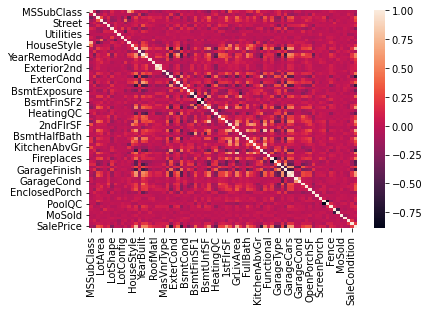

In [247]:
sns.heatmap(df.corr())

Split train test

In [248]:
X=df.drop(['SalePrice'],1)
y=df['SalePrice'].values.reshape(-1,1)


In [249]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=0)

In [250]:
train_X.shape,train_y.shape

((1168, 76), (1168, 1))

# Modelling

In [251]:
catboost_model = CatBoostRegressor(silent=True)
catboost_model.fit(train_X,train_y)
cat_crosval=cross_val_score(catboost_model,X,y,cv=5)
print('Crosval: ', cat_crosval.mean())

Crosval:  0.8797746210177383


In [252]:
catboost_pred = catboost_model.predict(test_X)

catmae=mean_absolute_error(test_y,catboost_pred)
catmse=mean_squared_error(test_y,catboost_pred)
catrmse=mean_squared_error(test_y,catboost_pred,squared=False)
catmape=mean_absolute_percentage_error(test_y,catboost_pred)
catr2 = r2_score(test_y, catboost_pred)

print('MAE: ',catmae)
print('MSE: ',catmse)
print('RMSE: ',catrmse)
print('MAPE: ',catmape)
print('r2: ',catr2)

MAE:  16492.084976859365
MSE:  886835287.8370928
RMSE:  29779.77984870091
MAPE:  0.09061283074285172
r2:  0.8715820221320066


In [253]:
test_y = test_y.reshape(-1)
compare_cat = pd.DataFrame( {'Actual' : test_y.flatten() ,
                        'Predictions' : catboost_pred.flatten() ,
                        'Error percentage' : (catboost_pred.flatten() - test_y.flatten()) / test_y.flatten() *100} )

compare_cat

,Actual,Predictions,Error percentage
0,200624,225493.520213,12.396084
1,133000,162340.447268,22.060487
2,110000,106559.358417,-3.127856
3,192000,213952.183416,11.433429
4,88000,89422.788479,1.616805
5,85000,92658.958186,9.010539
6,282922,243427.329168,-13.959562
7,141000,137208.855828,-2.688755
8,745000,495804.230352,-33.449097
9,148800,153736.599823,3.317607


In [254]:
linreg=LinearRegression()
linreg.fit(train_X,train_y)
crosval_lin=cross_val_score(linreg,X,y,cv=5)
print('Score: ', crosval_lin.mean())

Score:  0.8018714752175569


In [255]:
linregpred=linreg.predict(test_X)

linmae=mean_absolute_error(test_y,linregpred)
linmse=mean_squared_error(test_y,linregpred)
linrmse=mean_squared_error(test_y,linregpred,squared=False)
linmape=mean_absolute_percentage_error(test_y,linregpred)
linr2 = r2_score(test_y, linregpred)

print('MAE: ',linmae)
print('MSE: ',linmse)
print('RMSE: ',linrmse)
print('MAPE: ',linmape)
print('r2: ',linr2)

MAE:  21731.94714801319
MSE:  2378766566.6887155
RMSE:  48772.60057336204
MAPE:  0.12707430768431754
r2:  0.6555432598321813


In [256]:
dtr=DecisionTreeRegressor()
dtr.fit(train_X,train_y)
crosval_dtr=cross_val_score(dtr,X,y,cv=5)
print('Score: ',crosval_dtr.mean())

Score:  0.716872360875888


In [257]:
dtrpred=dtr.predict(test_X)
dtrmae=mean_absolute_error(test_y,dtrpred)
dtrmse=mean_squared_error(test_y,dtrpred)
dtrrmse=mean_squared_error(test_y,dtrpred,squared=False)
dtrmape=mean_absolute_percentage_error(test_y,dtrpred)
dtrr2 = r2_score(test_y,dtrpred)

print('MAE: ',dtrmae)
print('MSE: ',dtrmse)
print('RMSE: ',dtrrmse)
print('MAPE: ',dtrmape)
print('r2:',dtrr2)


MAE:  24236.883561643837
MSE:  1248557622.5
RMSE:  35334.93487329501
MAPE:  0.13802118446257805
r2: 0.8192029034792168


In [258]:
rfc=RandomForestRegressor()
rfc.fit(train_X,train_y)
crosval_rfc = cross_val_score(rfc, X, y,cv=10)
print('Score: ',crosval_rfc.mean())

Score:  0.8633244295597802


In [259]:
rfcpred=rfc.predict(test_X)
rfcmae=mean_absolute_error(test_y,rfcpred)
rfcmse=mean_squared_error(test_y,rfcpred)
rfcrmse=mean_squared_error(test_y,rfcpred,squared=False)
rfcmape=mean_absolute_percentage_error(test_y,rfcpred)
rfcr2 = r2_score(test_y,rfcpred)
print('MAE: ',rfcmae)
print('MSE: ',rfcmse)
print('RMSE: ',rfcrmse)
print('MAPE: ',rfcmape)
print('r2:',rfcr2)

MAE:  17319.564006849316
MSE:  1011407907.9700017
RMSE:  31802.639952840418
MAPE:  0.09703622713756434
r2: 0.8535433128084275


In [260]:
results = pd.DataFrame([
    ['Catboost', catmape,catr2],
    ['Linear Regression',linmape,linr2],
    ['DecisionTreeRegressor',dtrmape,dtrr2],
    ["RandomForestRegressor",rfcmape,rfcr2]
], columns=['Model', 'MAPE', 'r2 Score'])

results.sort_values(by=['r2 Score'],ascending=False)

,Model,MAPE,r2 Score
0,Catboost,0.090613,0.871582
3,RandomForestRegressor,0.097036,0.853543
2,DecisionTreeRegressor,0.138021,0.819203
1,Linear Regression,0.127074,0.655543


# Submission

In [261]:
df_test = test

In [262]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [263]:
missing_data_test=df_test.isna().sum()
missing_data_test = missing_data_test[missing_data_test>0]
missing_data_test.sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [264]:
# List of columns to fill with 'Unknown'
columns_to_fill = ['Alley',  'MiscFeature','PoolQC','Fence','FireplaceQu',
                   'GarageType', 'GarageFinish','GarageQual', 'GarageCond', 'MasVnrType', 
                   'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond', 'BsmtQual']

# Fill missing values with 'Unknown'
df_test[columns_to_fill] = df_test[columns_to_fill].fillna('Unknown')

df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].median()) #This missing value can be replaced with median or mean LotFrontage of the neighborhood
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
df_test['GarageYrBlt']=df_test['GarageYrBlt'].fillna(0)
df_test['Electrical']=df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])


In [265]:
# List of columns to fill with 'Unknown'
columns_to_fill = [ 'MSZoning','Utilities','Exterior1st',    
    'Exterior2nd','KitchenQual','Functional','SaleType',]

# Fill missing values with 'Unknown'
df_test[columns_to_fill] = df_test[columns_to_fill].fillna('Unknown')

In [266]:
# List of columns to fill with 'Unknown'
columns_to_fill = [ 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
    'TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea',]

# Fill missing values with 'Unknown'
df_test[columns_to_fill] = df_test[columns_to_fill].fillna(0)



In [267]:
missing_data_test=df_test.isna().sum()
missing_data_test = missing_data_test[missing_data_test>0]
missing_data_test.sort_values(ascending=False)

Series([], dtype: int64)

In [268]:
le=LabelEncoder()
catcol=[col for col in df_test.columns if df_test[col].dtype == 'object']
for col in catcol:
    df_test[col]=le.fit_transform(df_test[col])

In [269]:
test_X.shape, df_test.shape

((292, 76), (1459, 80))

In [270]:
test_pred = catboost_model.predict(df_test)

In [271]:
submission['SalePrice'] = test_pred
#submission.to_csv('submission.csv',index = False)

In [272]:
submission.head()

,Id,SalePrice
0,1461,128220.315658
1,1462,168433.442054
2,1463,189498.483545
3,1464,193275.048333
4,1465,178997.034616
